# STAT40800 Midterm Assignment
## Exploratory data analysis of the Irish weather

For this assignment you will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

### Instructions
* Solutions must be submitted on Brightspace under *Assessments* $\rightarrow$ *Midterm Assignment*.
* Your submission must include your completed Jupyter notebook in .ipynb **and** PDF format. To create a PDF of your notebook select *File* $\rightarrow$ *Download as* $\rightarrow$ *PDF via LaTeX (.pdf)*. \[Alternatively *Save and export Notebook as* $\rightarrow$ *PDF*\]
* All of the results that you wish to include should be viewable without running the Python code. Note that the code may still be run by the grader to check that it functions properly and as intended.
* Marks will be awarded for complete and correct answers to all 9 questions. An additional 10 marks will be reserved for organisation, presentation and conciseness.
* For full marks, you must justify your answers, clearly explain all steps and computations, label your figures, and write concise code.
* The assignment must be completed individually. 


This assignment is **due at 11:59pm on November 5th, 2023**.

In [ ]:
# Load in necessary packages
import pandas as pd

1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)


In [5]:
import pandas as pd

weather = pd.read_csv('weather_1819.csv',skiprows=11) # skipping the legend of the data file

**Describing the Data**

The weather dataset contains historic Irish weather data from Met Eireann.

- 2 years of recordings are included (2018 & 2019) with measurements from Dublin, Shannon, Cork, and Knock airports
- the temporal resolution of the dataset can be described as daily, with a start date of 01/01/2018 and end date 31/12/2019
- maximum and minimum temperature (C), precipitation amount (mm), mean wind speed (knot), highest gust (knot), and sunshine duration (hours) are the reported weather measurements

2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)

    **Note:** You do not need to implement any of your suggested strategies.

In [4]:
print("Total amount of missing values in each column of the dataset:\n\n{}".format(weather.isnull().sum()))

# OUTPUT: Total amount of missing values in each column of the dataset:

# day         0
# month       0
# year        0
# station     0
# maxtp      18
# mintp      18
# rain       23
# wdsp        5
# hg         16
# sun         7
# dtype: int64

Total amount of missing values in each column of the dataset:

day         0
month       0
year        0
station     0
maxtp      18
mintp      18
rain       23
wdsp        5
hg         16
sun         7
dtype: int64


**Possible reasons for missing entries in the dataset**

1. Missing or Malfunctioning Equipment

It is possible that weather measurements may have been missed due to broken or missing equipment (such as rain gauges and anemometers) at a location. Maintenance of equipment could have likely led to additional missing values within the same period of time as well. 

2. Unforeseen Circumstances

It is likely some weather measurements were missed due to technical failures such as network outages or crashes, or even simply human error. Accidents and mistakes can happen during data recording or trasmission which could have resulted in missing values.

**Strategies for filling the missing values**
1. Replace with Zeros (**weather.fillna(0)**) 

Advantage: This method allows for error-free data handling and analysis, as it replaces missing values with a neutral placeholder.

Disadvantage: Using 0 as a placeholder may introduce inaccuracies depending on the date of the entry, as it doesn't consider the context of surrounding measurements, potentially skewing trends or patterns within the dataset. For example, 0 hours of sunshine may be acceptable in winter months, but if filled in the middle of a heat wave in July, could throw off the trend of the dataset severely.

2. Fill with Mean or Median (**weather.fillna(weather.mean())** or **weather.fillna(weather.median())**)

Advantage: These methods provide a more representative value, reducing data distortion compared to strategy #1.

Disadvantage: Filling with the mean or median can still mislead data analysis, especially when dealing with short-term extreme conditions or outliers. A solution would be to separate the dataset per season and fill the missing values with seasonal averages, however, I believe there are more efficient strategies to deal with missing values for this dataset.

3. Forward/Backward Fill (**weather.fillna(method='pad')** or **weather.fillna(method='bfill')**) 

Advantage: These approaches maintain flexibility and are less likely to introduce extreme or inaccurate values for a specific season.

Disadvantage: While reducing the risk of inaccurate values, this method may still produce misleading results for data analysis.

4. Linear Interpolation (**weather.interpolate(method='linear', limit_direction='forward')**)

Advantage: Linear interpolation treats data points as equally spaced and so would create a smoother transition between values, leaving a good representation of the flow of weather from one day to the next. 

Disadvantage: Despite its advantages, it is still not fully inaccurate and reduces the integrity of the data.

5. Remove Rows with Missing Values (**weather.dropna()**)

Advantage: This approach preserves data integrity and is efficient, as it removes only a negligible fraction of the dataset (a max of 87 out of roughly 2300 rows of data, or roughly 0.29%).

Disadvantage: It results in data loss and would not be suitable if all data points are valuable.

3. Write code to answer the following questions: (15 marks)
    1. At what station and on what date was the highest wind speed recorded?
    1. At what station and on what date was the highest maximum air temperature recorded?
    1. At what station and on what date was the largest amount of rain recorded?

In [3]:
import pandas as pd

weather = pd.read_csv('weather_1819.csv',skiprows=11)

f = "{} {} {}" # shortening code, this is the format of the date (dd mm yyyy)

# 1
max_wdsp = weather['wdsp'].idxmax() # locating index of the max
date = f.format(weather.loc[max_wdsp,'day'],weather.loc[max_wdsp,'month'],weather.loc[max_wdsp,'year']) # formatting date beforehand so print() isn't too long
print("On {}, the highest wind speed was recorded at {} with a measurement of {} knots.".format(date,weather.loc[max_wdsp,'station'],weather.loc[max_wdsp,'wdsp']))

# OUTPUT: 
# On 2 mar 2018, the highest wind speed was recorded at Dublin Airport with a measurement of 28.5 knots.

# 2
max_maxtp = weather['maxtp'].idxmax()
date = f.format(weather.loc[max_maxtp,'day'],weather.loc[max_maxtp,'month'],weather.loc[max_maxtp,'year'])
print("On {}, the highest air temperature was recorded at {} with a measurement of {} C.".format(date,weather.loc[max_maxtp,'station'],weather.loc[max_maxtp,'maxtp']))

# OUTPUT: 
# On 28 jun 2018, the highest air temperature was recorded at Shannon Airport with a measurement of 32.0 C.

# 3
max_rain = weather['rain'].idxmax()
date = f.format(weather.loc[max_rain,'day'],weather.loc[max_rain,'month'],weather.loc[max_rain,'year'])
print("On {}, the largest amount of rain was recorded at {} with a measurement of {} mm.".format(date,weather.loc[max_rain,'station'],weather.loc[max_rain,'rain']))

# OUTPUT: 
# On 15 apr 2019, the largest amount of rain was recorded at Cork Airport with a measurement of 54.6 mm.

On 2 mar 2018, the highest wind speed was recorded at Dublin Airport with a measurement of 28.5 knots.
On 28 jun 2018, the highest air temperature was recorded at Shannon Airport with a measurement of 32.0 C.
On 15 apr 2019, the largest amount of rain was recorded at Cork Airport with a measurement of 54.6 mm.


4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [25]:
# could use .describe() but i want to make a df from scratch

s = {'Measurement': [], 'Mean': [], 'Median': [], 'Standard Deviation': [], 'Minimum': [], 'Maximum': []} # dict for df
summary = pd.DataFrame(s,index=s['Measurement'],columns=['Mean', 'Median', 'Std Deviation', 'Min', 'Max']) # df from dict

maxtp = weather['maxtp'] # shortening code
mintp = weather['mintp']
rain = weather['rain']
wdsp = weather['wdsp']
hg = weather['hg']
sun = weather['sun']

summary.loc['Max Temperature (C)'] = [maxtp.mean(),maxtp.median(),maxtp.std(),maxtp.min(),maxtp.max()] # adding separately for organisation; easy to change
summary.loc['Min Temperature (C)'] = [mintp.mean(),mintp.median(),mintp.std(),mintp.min(),mintp.max()]
summary.loc['Precipitation Amount (mm)'] = [rain.mean(),rain.median(),rain.std(),rain.min(),rain.max()]
summary.loc['Wind Speed (kn)'] = [wdsp.mean(),wdsp.std(),wdsp.median(),wdsp.min(),wdsp.max()]
summary.loc['Highest Gust (kn)'] = [hg.mean(),hg.median(),hg.std(),hg.min(),hg.max()]
summary.loc['Sunshine Duration (hrs)'] = [sun.mean(),sun.median(),sun.std(),sun.min(),sun.max()] 

print("Numerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.\n\n",summary)

# OUTPUT: Numerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.

#                                  Mean     Median  Std Deviation  Min   Max
# Max Temperature (C)        13.283150  12.800000       5.146289 -1.8  32.0
# Min Temperature (C)         6.432977   6.400000       4.368755 -7.0  18.9
# Precipitation Amount (mm)   3.063583   0.700000       5.053881  0.0  54.6
# Wind Speed (kn)             9.481475   3.820605       8.900000  2.3  28.5
# Highest Gust (kn)          25.443871  24.000000       9.278313  7.0  84.0
# Sunshine Duration (hrs)     3.783797   2.600000       3.850012  0.0  15.9


Numerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.

                                 Mean     Median  Std Deviation  Min   Max
Max Temperature (C)        13.283150  12.800000       5.146289 -1.8  32.0
Min Temperature (C)         6.432977   6.400000       4.368755 -7.0  18.9
Precipitation Amount (mm)   3.063583   0.700000       5.053881  0.0  54.6
Wind Speed (kn)             9.481475   3.820605       8.900000  2.3  28.5
Highest Gust (kn)          25.443871  24.000000       9.278313  7.0  84.0
Sunshine Duration (hrs)     3.783797   2.600000       3.850012  0.0  15.9


**Discussion and Interpretation of Results**

The lowest temperature recorded is -7 C and the highest is 32 C. This range highlights the seasonal temperature variation throughout 2018 and 2019. The mean and median minimum temperature is 6.43 C and 6.40 C, while the mean and median maximum temperature is 13.28 C and 12.80 C, respectively. The standard devation is 4.37 C for minimum temperature, and 5.15 C for maximum temperature, indicating high variability in daily temperature.

The lowest precipitation amount recorded is 0 mm and the highest is 54.6 mm. The mean and median precipitation amount is 3.06 mm and 0.70 mm, respectively. The significantly lower median means that the majority of the days had little rain, but occasional days experienced high levels of rainfall, suggesting a positively skewed distribution. The standard devation is 5.05 mm, indicating a high variability in daily rainfall.   

The lowest wind speed recorded is 2.3 kn and the highest is 28.5 kn. The mean and median wind speed is 9.48 kn and 3.82 kn, respectively. This suggests a positively skewed distribution, similar to precipitation amount. The majority of the days had low wind speeds, but occassional strong storms took place. The standard deviation is 8.90 kn, indicating significant diversity in daily wind speeds.

The minimum highest gust recorded is 7.0 kn and the highest is 84 kn, suggesting ocassional strong storms. The mean and median highest gust is 25.44 kn and 24.0 kn, respectively, indicating a more symmetric distribution. The standard devation is 9.28 kn, indicating significant diversity on day-to-day highest gust speeds.

The shortest sunshine duration recorded is 0 hours, and the highest is 15.9 hours. The mean and median sunshine duration is 3.78 hours and 2.60 hours, respectively. This suggests a slightly positively skewed distribution and also indicates cloudy skies for the majority of the year. The standard devation is 3.85 hours, which is very little in comparison to other weather measurements, indicating that little sunshine duration is relatively constant around Ireland.

5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

<Figure size 640x480 with 0 Axes>

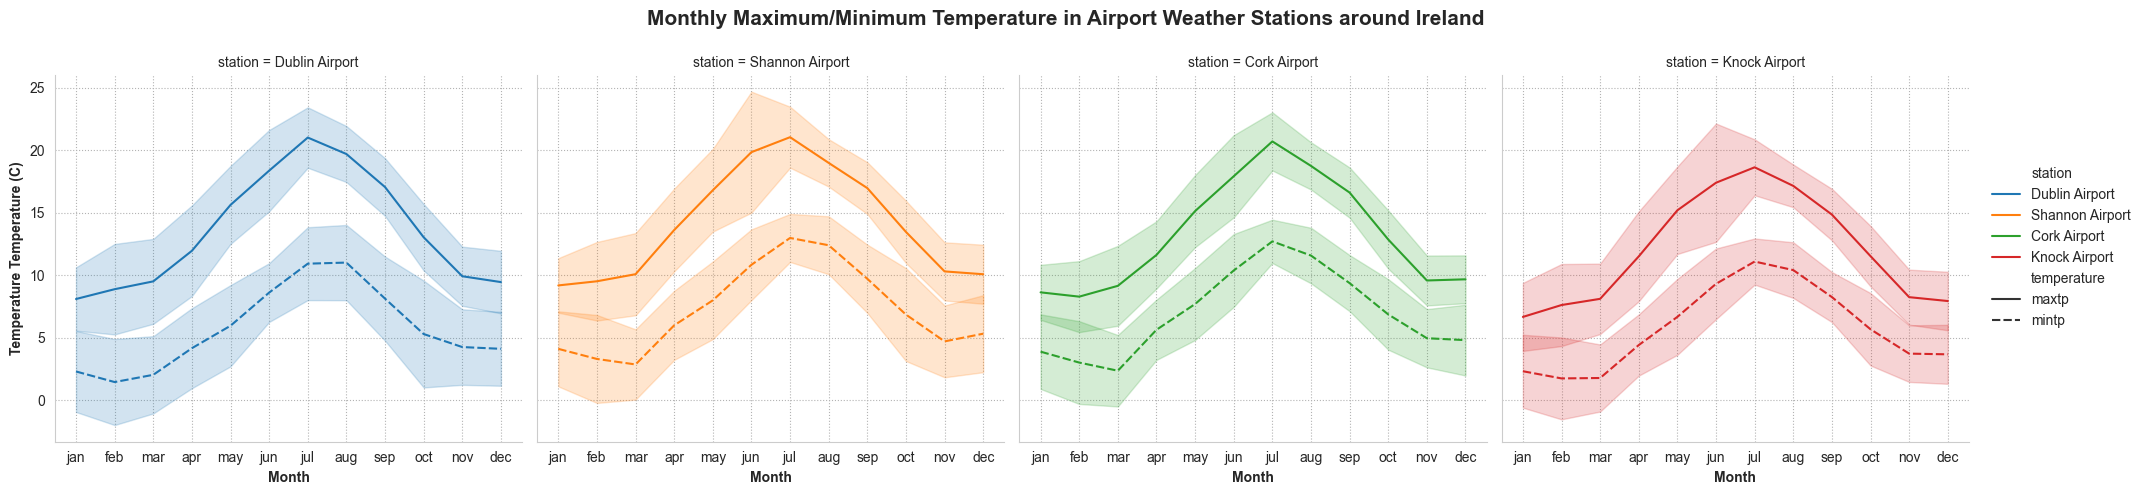

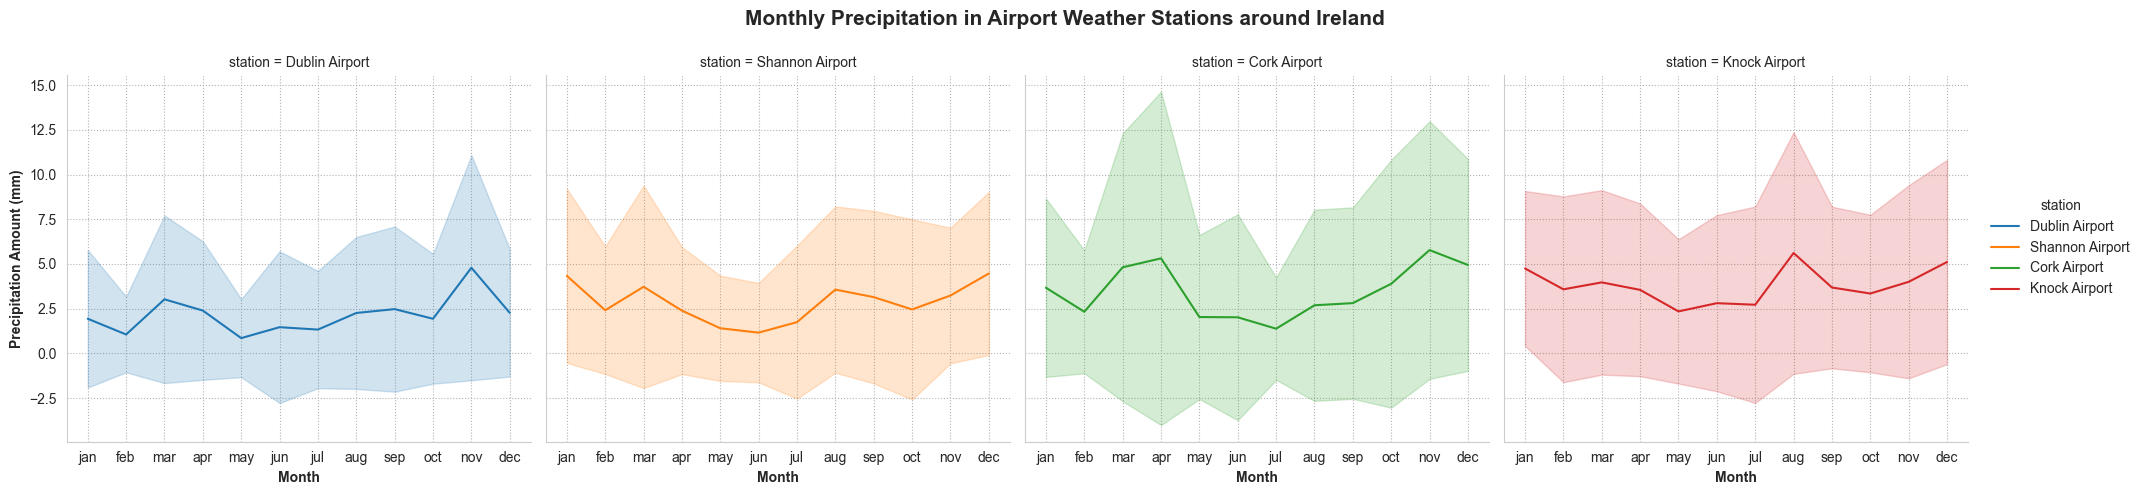

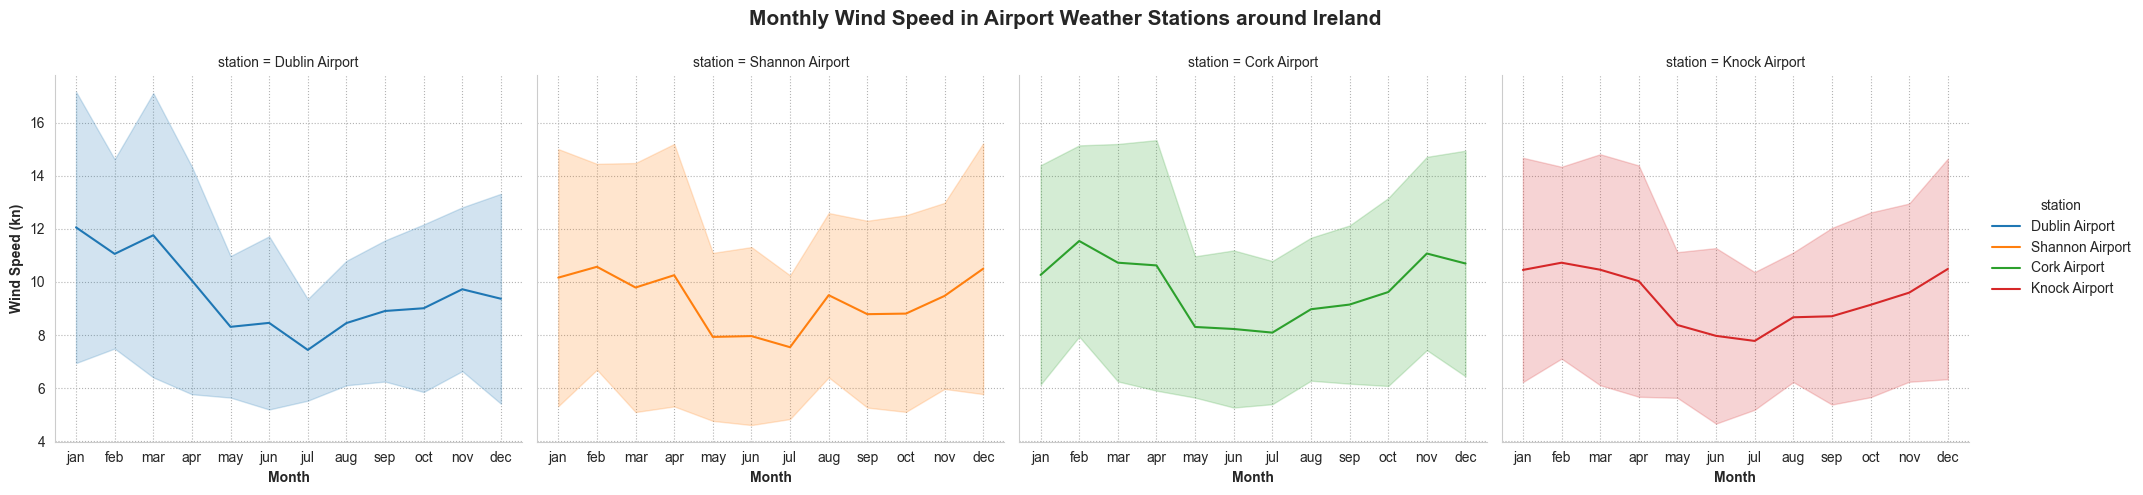

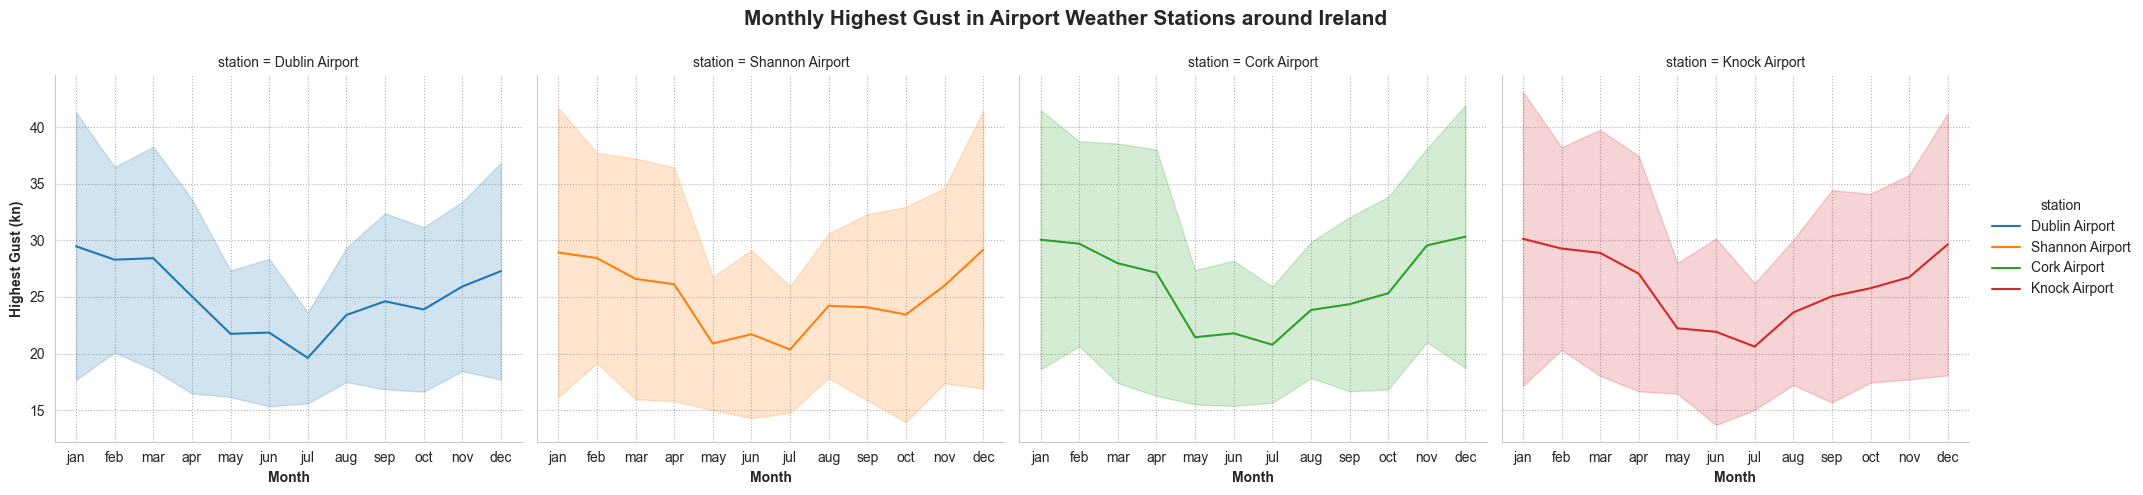

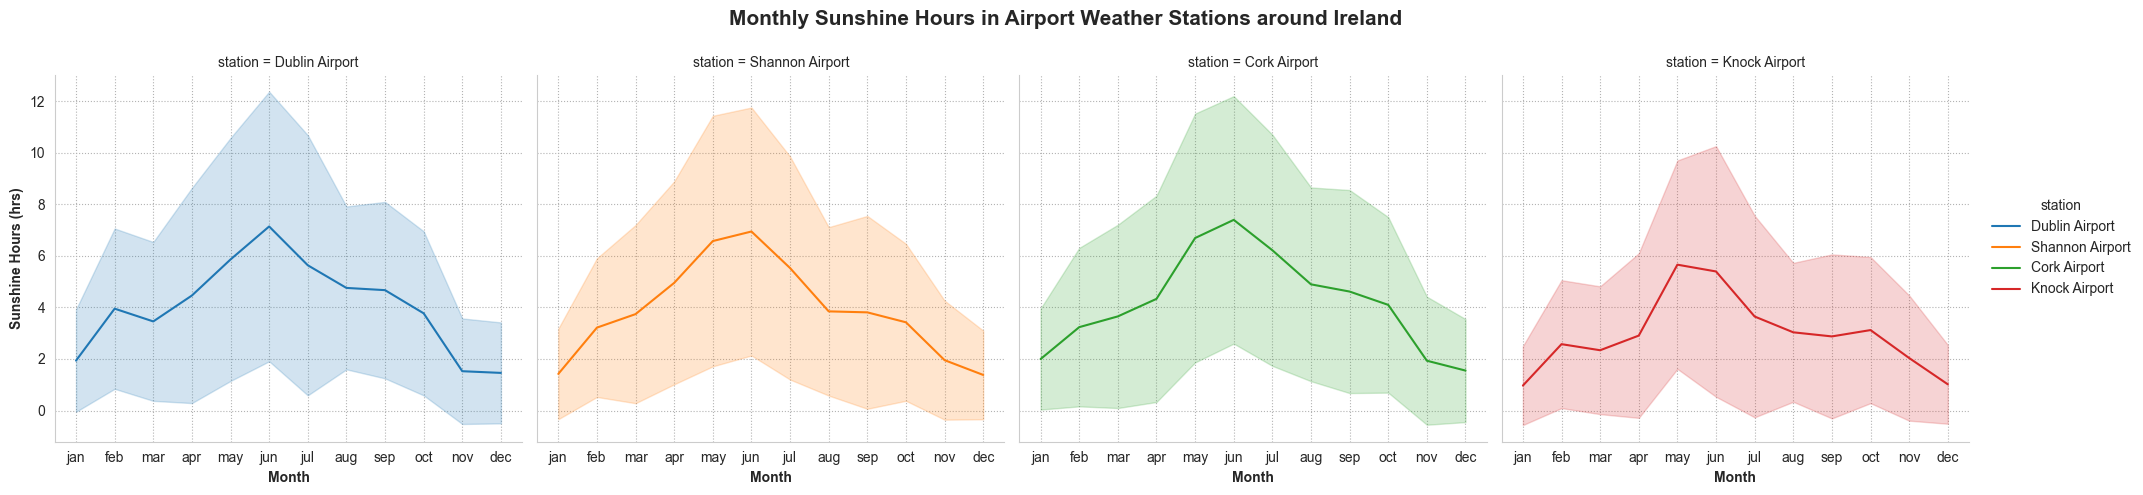

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather = pd.read_csv('weather_1819.csv',skiprows=11)

sns.set_style('whitegrid',{'grid.color':'.7','grid.linestyle':':'}) # readable background so the individual monthly measurements are easy to read

weather_melted = weather.melt(['day','month','year','station','rain','wdsp','hg','sun'],var_name="temperature",value_name="tp") # melting minimum + maximum temperatures so they can be plotted together

plt.figure()
maxtp = sns.relplot(data=weather_melted,x='month',y='tp',col='station',hue='station',style='temperature',kind='line',errorbar='sd') # plotting standard deviation instead of 95% ci to compare with numerical summary
rain = sns.relplot(data=weather,x='month',y='rain',col='station',hue='station',kind='line',errorbar='sd')
wdsp = sns.relplot(data=weather,x='month',y='wdsp',col='station',hue='station',kind='line',errorbar='sd')
hg = sns.relplot(data=weather,x='month',y='hg',col='station',hue='station',kind='line',errorbar='sd')
sun = sns.relplot(data=weather,x='month',y='sun',col='station',hue='station',kind='line',errorbar='sd')

# supporting titles
maxtp.fig.subplots_adjust(top=.85) # so the title does not intercept the individual graph titles
maxtp.fig.suptitle('Monthly Maximum/Minimum Temperature in Airport Weather Stations around Ireland',size=15,weight='bold')
rain.fig.subplots_adjust(top=.85)
rain.fig.suptitle('Monthly Precipitation in Airport Weather Stations around Ireland',size=15,weight='bold')
wdsp.fig.subplots_adjust(top=.85)
wdsp.fig.suptitle('Monthly Wind Speed in Airport Weather Stations around Ireland',size=15,weight='bold')
hg.fig.subplots_adjust(top=.85)
hg.fig.suptitle('Monthly Highest Gust in Airport Weather Stations around Ireland',size=15,weight='bold')
sun.fig.subplots_adjust(top=.85)
sun.fig.suptitle('Monthly Sunshine Hours in Airport Weather Stations around Ireland',size=15,weight='bold')

# axis labels
maxtp.set_axis_labels('Month','Temperature Temperature (C)',size=10,weight='bold')
rain.set_axis_labels('Month','Precipitation Amount (mm)',size=10,weight='bold')
wdsp.set_axis_labels('Month','Wind Speed (kn)',size=10,weight='bold')
hg.set_axis_labels('Month','Highest Gust (kn)',size=10,weight='bold')
sun.set_axis_labels('Month','Sunshine Hours (hrs)',size=10,weight='bold')


**Discussion and Interpretation of Results**

All weather measurements are relatively similar throughout the various airport stations around Ireland, which is to be expected considering the small size of the island.

There is a decrease in precipitation in the summer months of May, June, and July with a mean of around 1.25 mm, and an increase to a mean of approximately 4.5 mm in the late Autumn and Winter months of October, November, and December. Taking into account the full year, this averages to a mean of approximately 3 mm, consistent with that of the numerical summary.

Similarly, there is a decrease in wind speed from May to July with a mean of 8 kn, and an large increase in October to February with a mean of 10.5 kn. Taking into account the full year, this averages to a mean of approximately 9.5 kn, consistent with that of the numerical summary. 

Finally, sunshine hours peak siginificantly in May and June to a mean of 7 hours, and decrease drastically to around 2 hours in December and January. Taking into account the full year, this averages to a mean of approximately 3.8 hours, consistent with that of the numerical summary. 


Despite their similarities, there are a few notable distinctions to be made between the various airport stations.

Cork Airport experienced siginificant precipitation in March and April, while other stations did not. Dublin and Knock airports had record precipitation amounts in later months; November and August, respectively. 

Dublin Airport experienced higher wind speeds in January and February in comparison to the other airport stations, and slightly lower wind speeds in December alone.

Knock Airport experienced lower maximum and minimum temperatures as well as less sunshine hours on average at almost every month of the year, while other airport stations followed almost identical peaks. This suggests more cloudy weather in that region.

6. Produce a scatter plot of the mean wind speed versus the highest gust and colour your points based on month. Interpret your plot. (8 marks)

<Figure size 640x480 with 0 Axes>

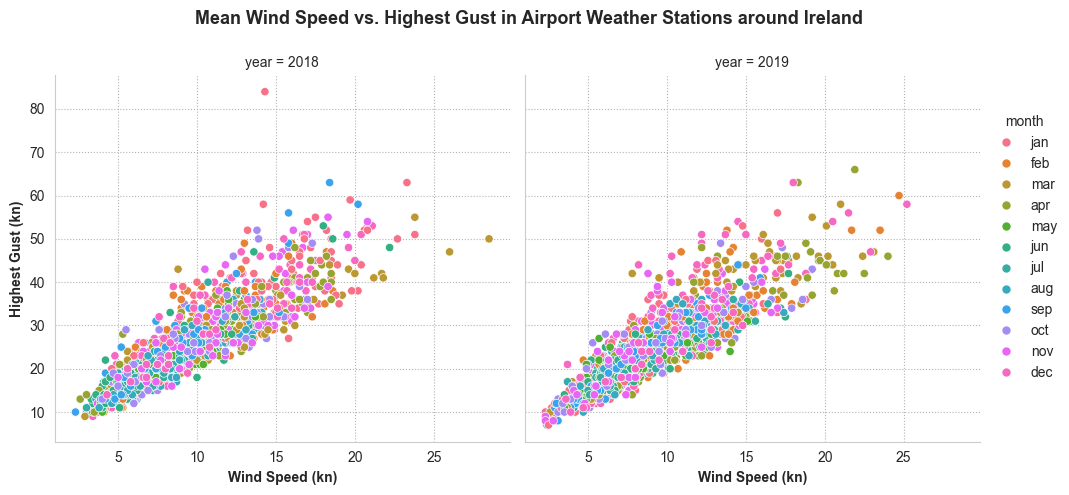

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather = pd.read_csv('weather_1819.csv',skiprows=11)

plt.figure()
wdsp_hg = sns.relplot(data=weather,x='wdsp',y='hg',hue='month',col='year')

wdsp_hg.fig.subplots_adjust(top=.85)
wdsp_hg.fig.suptitle('Mean Wind Speed vs. Highest Gust in Airport Weather Stations around Ireland',size=13,weight='bold')

wdsp_hg.set_axis_labels('Wind Speed (kn)', 'Highest Gust (kn)',size=10,weight='bold')

**Plot Interpretation**

Wind speed and highest gust are positively correlated. In 2019, The months of February and March experienced the highest wind speeds and gusts overall. Lowest wind speeds and gusts are majorly associated with the later half of the year; the months of July to December.

There is one major outlier and that is a wind of speed 14 kn with a highest gust of speed 80 kn in 2018, suggesting a very strong storm took place. 

7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the last 10 rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [92]:
weather['tprange'] = weather['maxtp'] - weather['mintp']
print(weather.tail(10))

# OUTPUT:
      # day month  year        station  maxtp  mintp  rain  wdsp    hg  sun  \
# 2910   22   dec  2019  Knock Airport    7.0    2.7   4.8   8.0  20.0  3.1   
# 2911   23   dec  2019  Knock Airport    6.9    3.0   5.0  10.5  29.0  2.7   
# 2912   24   dec  2019  Knock Airport    6.6    3.1   0.7   8.4  24.0  2.9   
# 2913   25   dec  2019  Knock Airport    4.9    1.4   0.0   9.0  32.0  0.0   
# 2914   26   dec  2019  Knock Airport   10.0    4.8   6.2  12.2  34.0  0.0   
# 2915   27   dec  2019  Knock Airport   10.8    9.8   3.7  12.8  29.0  0.0   
# 2916   28   dec  2019  Knock Airport    9.8    7.9   0.0  14.8  30.0  0.0   
# 2917   29   dec  2019  Knock Airport   10.5    7.0   0.0  12.8  32.0  0.1   
# 2918   30   dec  2019  Knock Airport    9.6    3.4   NaN   8.4  21.0  0.0   
# 2919   31   dec  2019  Knock Airport    6.0    1.3   0.0   7.1  18.0  2.1   

      # tprange  
# 2910      4.3  
# 2911      3.9  
# 2912      3.5  
# 2913      3.5  
# 2914      5.2  
# 2915      1.0  
# 2916      1.9  
# 2917      3.5  
# 2918      6.2  
# 2919      4.7 

      day month  year        station  maxtp  mintp  rain  wdsp    hg  sun  \
2910   22   dec  2019  Knock Airport    7.0    2.7   4.8   8.0  20.0  3.1   
2911   23   dec  2019  Knock Airport    6.9    3.0   5.0  10.5  29.0  2.7   
2912   24   dec  2019  Knock Airport    6.6    3.1   0.7   8.4  24.0  2.9   
2913   25   dec  2019  Knock Airport    4.9    1.4   0.0   9.0  32.0  0.0   
2914   26   dec  2019  Knock Airport   10.0    4.8   6.2  12.2  34.0  0.0   
2915   27   dec  2019  Knock Airport   10.8    9.8   3.7  12.8  29.0  0.0   
2916   28   dec  2019  Knock Airport    9.8    7.9   0.0  14.8  30.0  0.0   
2917   29   dec  2019  Knock Airport   10.5    7.0   0.0  12.8  32.0  0.1   
2918   30   dec  2019  Knock Airport    9.6    3.4   NaN   8.4  21.0  0.0   
2919   31   dec  2019  Knock Airport    6.0    1.3   0.0   7.1  18.0  2.1   

      tprange  
2910      4.3  
2911      3.9  
2912      3.5  
2913      3.5  
2914      5.2  
2915      1.0  
2916      1.9  
2917      3.5  
2918    

8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on month. Interpret your plot. (8 marks)

<Figure size 640x480 with 0 Axes>

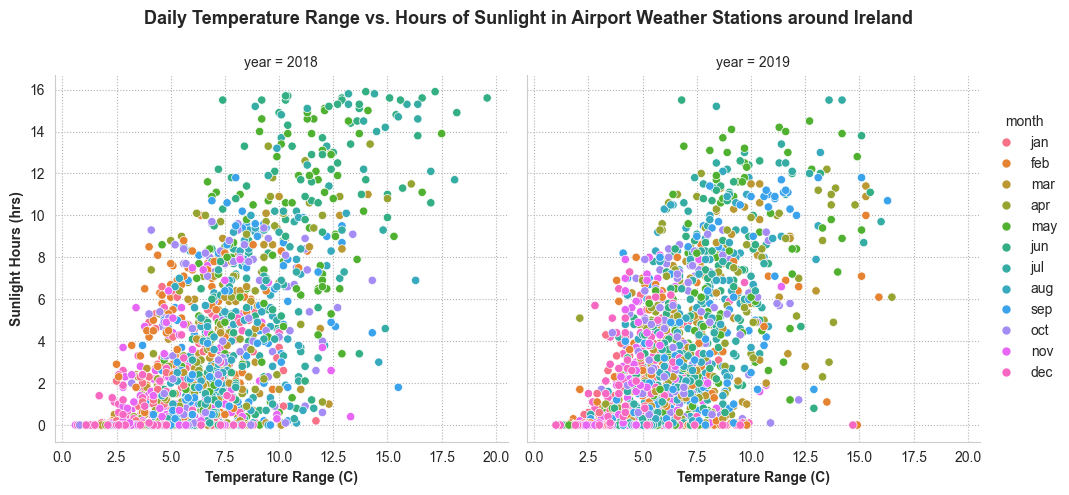

In [53]:
weather['tprange'] = weather['maxtp'] - weather['mintp']

plt.figure()
tprange_sun = sns.relplot(data=weather,x='tprange',y='sun',hue='month',col='year')

tprange_sun.fig.subplots_adjust(top=.85)
tprange_sun.fig.suptitle('Daily Temperature Range vs. Hours of Sunlight in Airport Weather Stations around Ireland',size=13,weight='bold')

tprange_sun.set_axis_labels('Temperature Range (C)', 'Sunlight Hours (hrs)',size=10,weight='bold')

**Plot Interpretation**

Temperature range and sunlight hours are positively correlated. 2018 experienced longer hours of sunlight with increasing temperature range throughout the year, suggesting slightly less cloudy weather that year.

The months of September to January have the least sunlight hours on average, although daily temperature ranges greatly vary between 0.5 C to 10 C. Inversely, the months of March to August have the most sunlight hours on average, with daily temperature ranges shifting to approximately 6 C to 15 C on average. 

Finally, a slight positive shift in temperature range is visible from 2018 to 2019, indicating climate change and warmer weather. 

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

**Comparative Analysis of 2018 & 2019 Weather in Airport Weather Stations around Ireland**

This analysis aims to explore the various weather measurements recorded daily in 2018 & 2019 across airport weather stations in Ireland through numerous numerical and graphical summaries. Maximum temperature, minimum temperature, precipitation, wind speed, highest gust, and sunshine hours are the weather measurements recorded. 

**Table 1. Record values for weather measurements in irport weather stations around Ireland**

The highest temperature recorded over the two years is 32 C at Shannon Airport on the 28th of June 2018, the same day the longest sunshine hours of 15.9 hours are recorded. The lowest temperature recorded is -7 C at Cork Airport on the 1st of March 2018. The highest rainfall recorded is 54.6 mm at Cork Airport on the 15th of April 2019. The highest wind speed recorded is 28.5 kn at Dublin Airport on the 2nd of March 2018. The highest gust recorded is 84 kn at Knock Airport on the 2nd of January 2018. 

**Table 2. Numerical summary of weather measurements in airport weather stations around Ireland**

The standard devation for temperature readings indicate high variability in daily temperature. The standard devation of precipitation amount is 5.05 mm, indicating a high variability in daily rainfall. For wind speeds, the majority of the days had low wind speeds, but occassional strong storms took place. The standard deviation is 8.90 kn, indicating significant diversity in daily wind speeds. The large range between the minimum and maximum highest gusts recorded suggests ocassional strong storms. The standard devation indicates significant diversity on day-to-day highest gust speeds. The mean and median sunshine duration indicates cloudy skies for the majority of the year. The standard devation is 3.85 hours, which is very little in comparison to other weather measurements, indicating that little sunshine duration is relatively constant around Ireland.

**Figure 1. Graphical summaries of weather measurements in airport weather stations around Ireland**

All weather measurements are relatively similar throughout the various airport stations around Ireland, which is to be expected considering the small size of the island.

There is a decrease in precipitation in the summer months of May, June, and July, and an increase in the late Autumn and Winter months of October, November, and December. Similarly, there is a decrease in wind speed from May to July, and a large increase in October to February. Finally, sunshine hours peak siginificantly in May and June, and decrease drastically in December and January. 

However, despite their similarities, there are a few notable distinctions to be made between the various airport stations. Cork Airport experienced siginificant precipitation in March and April, while other stations did not. Dublin and Knock airports had record precipitation amounts in later months; November and August, respectively. Dublin Airport experienced higher wind speeds in January and February in comparison to the other airport stations, and slightly lower wind speeds in December alone. Finally, Knock Airport experienced lower maximum and minimum temperatures as well as less sunshine hours on average at almost every month of the year, while other airport stations followed almost identical peaks. This suggests more cloudy weather in that region.

**Figure 2. Graphical summary of mean wind speeds vs highest gust in airport weather stations around Ireland**

Wind speed and highest gust are positively correlated. In 2019, The months of February and March experienced the highest wind speeds and gusts overall. Lowest wind speeds and gusts are majorly associated with the later half of the year; the months of July to December.

There is one major outlier and that is a wind of speed 14 kn with a highest gust of speed 80 kn in 2018, suggesting a very strong storm took place at Knock Airport. 

**Figure 3. Graphical summary of temperature range vs. sunshine hours in airport weather stations around Ireland**

Temperature range and sunlight hours are positively correlated. 2018 experienced longer hours of sunlight with increasing temperature range throughout the year, suggesting slightly less cloudy weather that year. The months of September to January have the least sunlight hours on average, although daily temperature ranges vary greatly. Inversely, the months of March to August have the most sunlight hours on average. Finally, a slight positive shift in temperature range is visible from 2018 to 2019, indicating climate change and warmer weather. 

All in all, the data presented suggests Ireland maintains a somewhat cold, windy climate, commonly paired with cloudy skies.

Record values for 2018 & 2019 weather measurements in airport weather stations around Ireland.

                            Record          Station         Date
Max Temperature (C)          32.0  Shannon Airport  28 jun 2018
Min Temperature (C)          -7.0     Cork Airport   1 mar 2018
Precipitation Amount (mm)    54.6     Cork Airport  15 apr 2019
Wind Speed (kn)              28.5   Dublin Airport   2 mar 2018
Highest Gust (kn)            84.0    Knock Airport   2 jan 2018
Sunshine Duration (hrs)      15.9   Dublin Airport  28 jun 2018


Numerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.

                                 Mean     Median  Std Deviation  Min   Max
Max Temperature (C)        13.283150  12.800000       5.146289 -1.8  32.0
Min Temperature (C)         6.432977   6.400000       4.368755 -7.0  18.9
Precipitation Amount (mm)   3.063583   0.700000       5.053881  0.0  54.6
Wind Speed (kn)             9.481475   3.820605 

<Figure size 640x480 with 0 Axes>

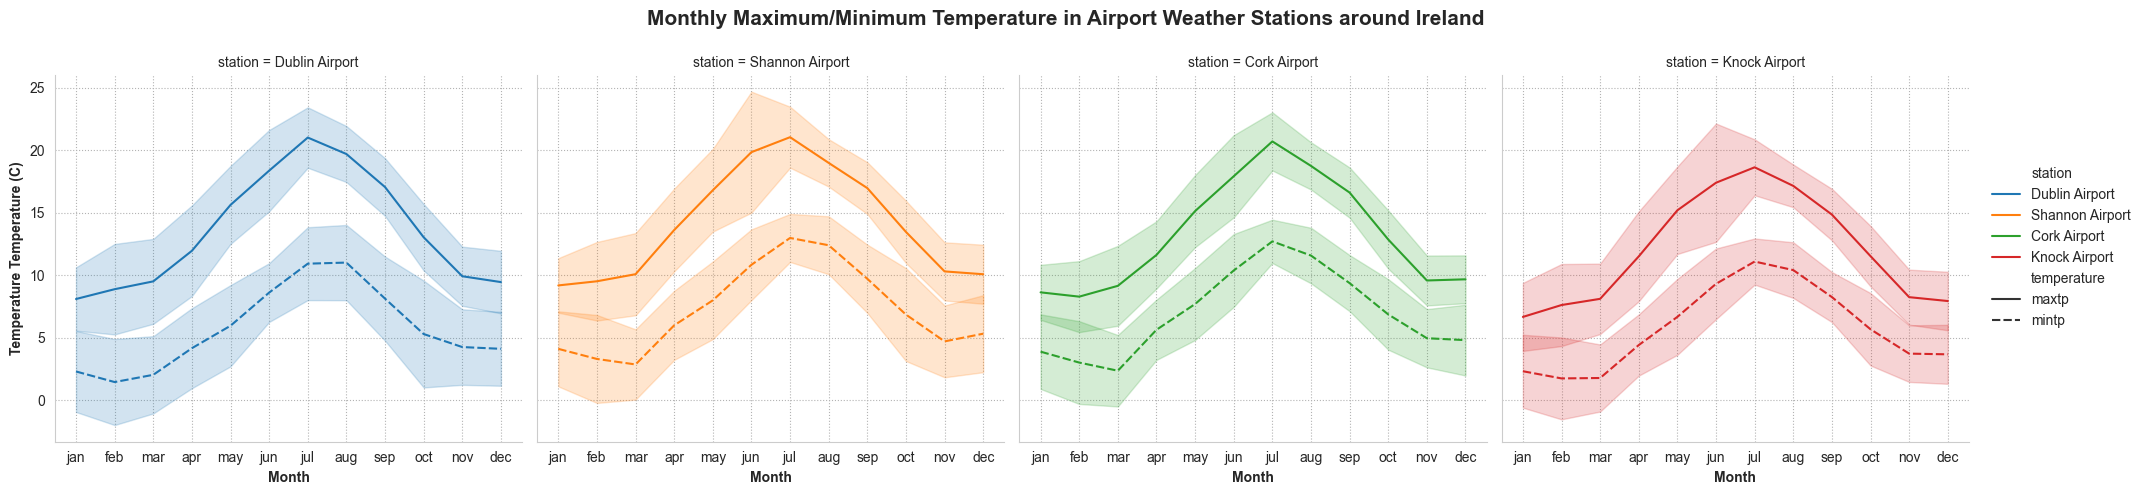

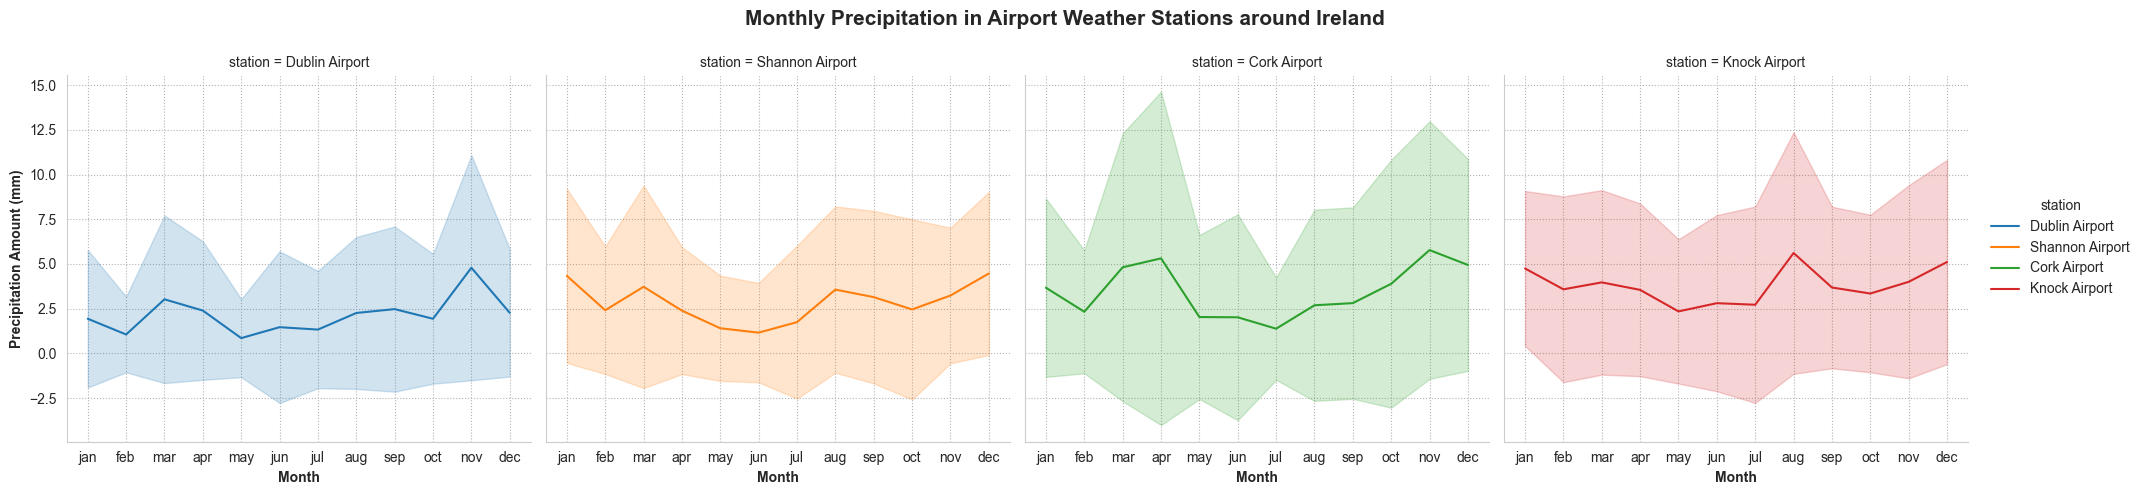

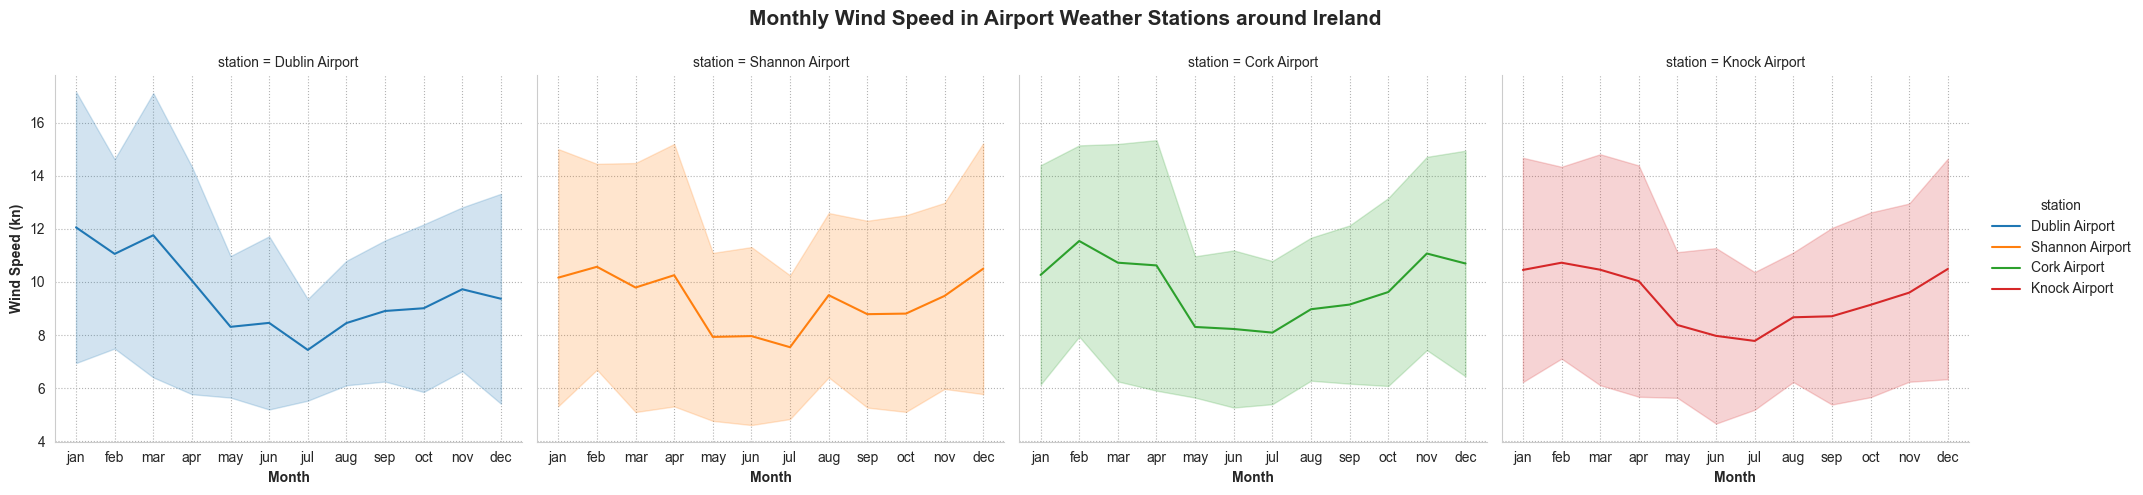

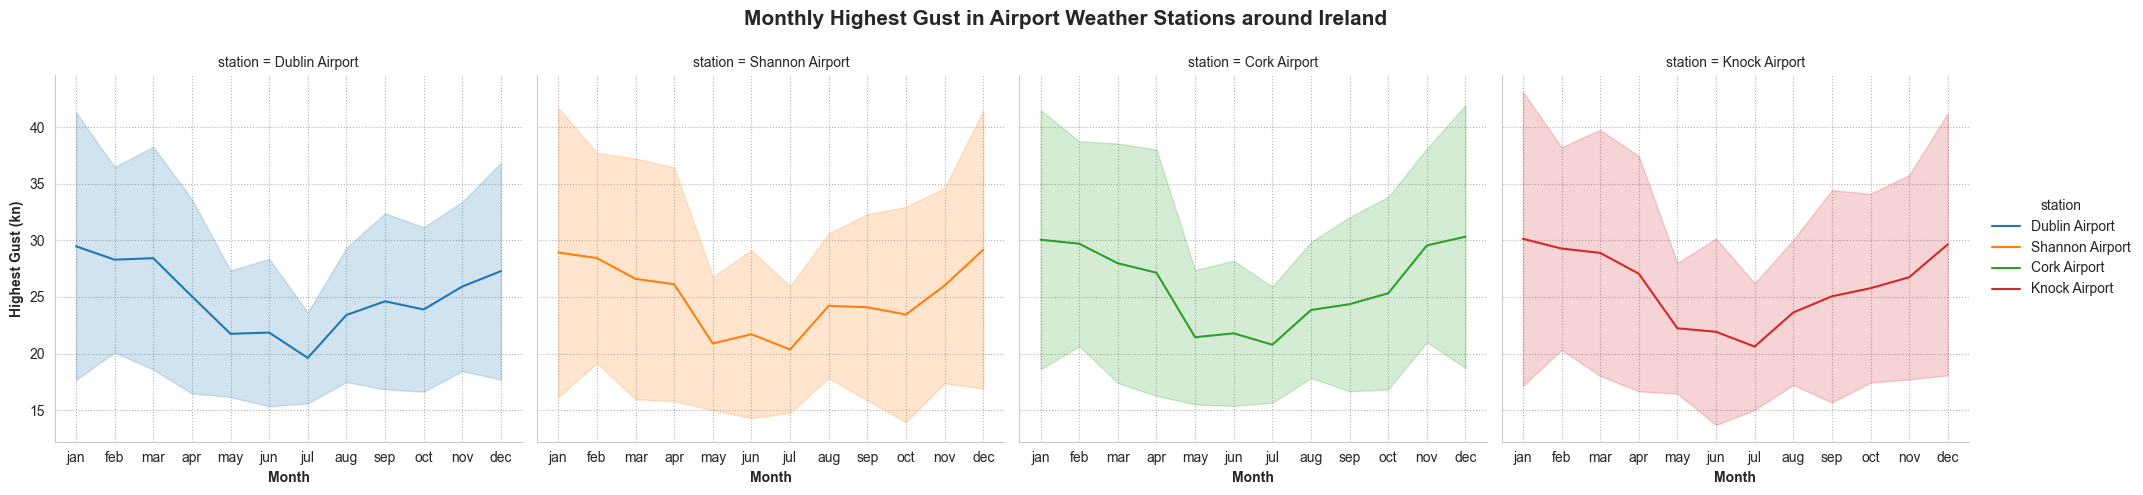

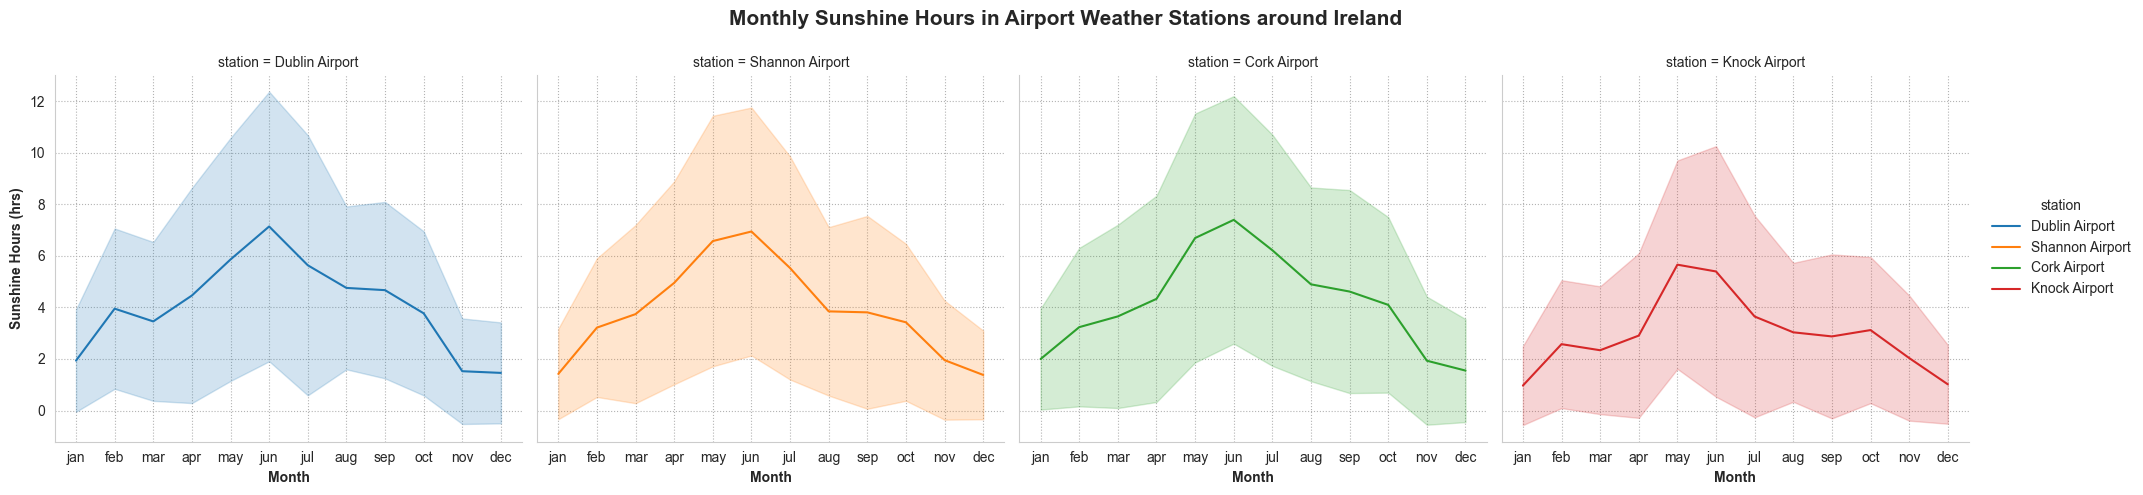

<Figure size 640x480 with 0 Axes>

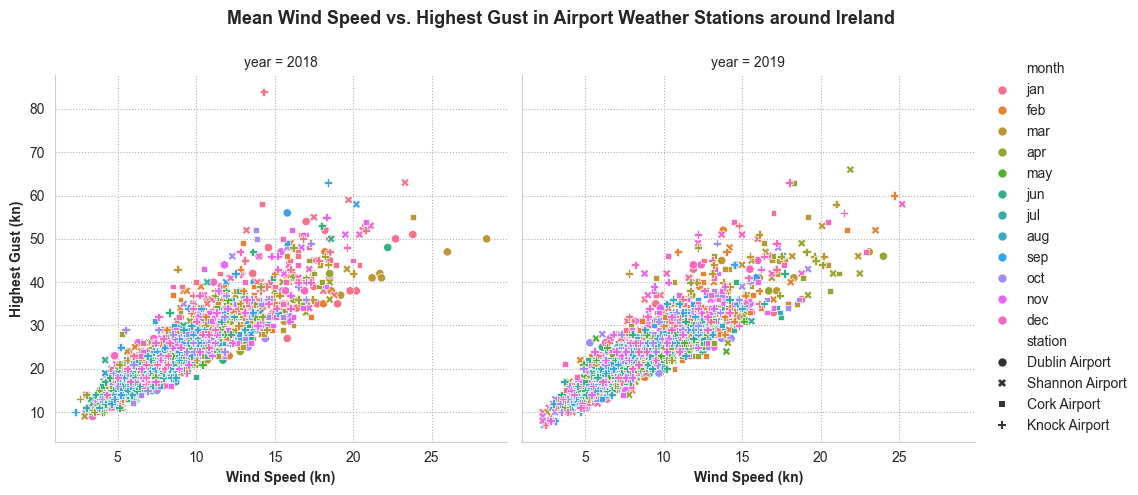

<Figure size 640x480 with 0 Axes>

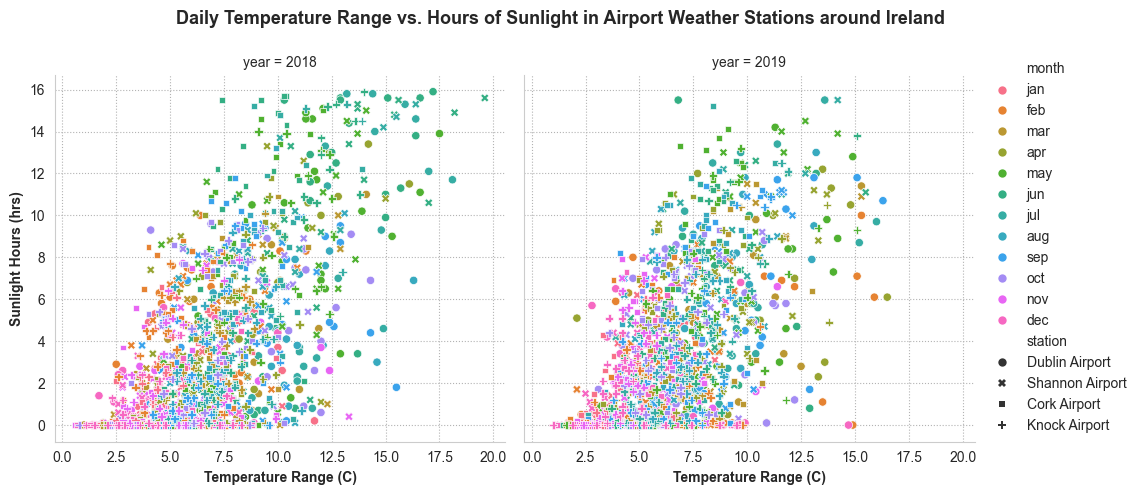

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather = pd.read_csv('weather_1819.csv',skiprows=11) # skipping the legend of the data file

# TABLE 1. RECORD VALUES FOR WEATHER MEASUREMENTS IN AIRPORT WEATHER STATIONS AROUND IRELAND
r = {'Measurement': [], 'Record': [], 'Station': [], 'Date': []}
records = pd.DataFrame(r,index=r['Measurement'],columns=['Record', 'Station', 'Date'])

f = "{} {} {}" # shortening code, this is the format of the date (dd mm yyyy)

maxtp = weather['maxtp'] # shortening code
mintp = weather['mintp']
rain = weather['rain']
wdsp = weather['wdsp']
hg = weather['hg']
sun = weather['sun']

max_tp = weather['maxtp'].idxmax()
min_tp = weather['mintp'].idxmin()
max_rain = weather['rain'].idxmax()
max_wdsp = weather['wdsp'].idxmax()
max_hg = weather['hg'].idxmax()
max_sun = weather['sun'].idxmax()

records.loc['Max Temperature (C)'] = [maxtp.max(),weather.loc[max_maxtp,'station'],f.format(weather.loc[max_tp,'day'],weather.loc[max_tp,'month'],weather.loc[max_tp,'year'])]
records.loc['Min Temperature (C)'] = [mintp.min(),weather.loc[min_tp,'station'],f.format(weather.loc[min_tp,'day'],weather.loc[min_tp,'month'],weather.loc[min_tp,'year'])]
records.loc['Precipitation Amount (mm)'] = [rain.max(),weather.loc[max_rain,'station'],f.format(weather.loc[max_rain,'day'],weather.loc[max_rain,'month'],weather.loc[max_rain,'year'])]
records.loc['Wind Speed (kn)'] = [wdsp.max(),weather.loc[max_wdsp,'station'],f.format(weather.loc[max_wdsp,'day'],weather.loc[max_wdsp,'month'],weather.loc[max_wdsp,'year'])]
records.loc['Highest Gust (kn)'] = [hg.max(),weather.loc[max_hg,'station'],f.format(weather.loc[max_hg,'day'],weather.loc[max_hg,'month'],weather.loc[max_hg,'year'])]
records.loc['Sunshine Duration (hrs)'] = [sun.max(),weather.loc[max_sun,'station'],f.format(weather.loc[max_sun,'day'],weather.loc[max_sun,'month'],weather.loc[max_sun,'year'])]

print("Record values for 2018 & 2019 weather measurements in airport weather stations around Ireland.\n\n",records)

# OUTPUT:
# Record values for 2018 & 2019 weather measurements in airport weather stations around Ireland.

#                             Record          Station         Date
# Max Temperature (C)          32.0  Shannon Airport  28 jun 2018
# Min Temperature (C)          -7.0     Cork Airport   1 mar 2018
# Precipitation Amount (mm)    54.6     Cork Airport  15 apr 2019
# Wind Speed (kn)              28.5   Dublin Airport   2 mar 2018
# Highest Gust (kn)            84.0    Knock Airport   2 jan 2018
# Sunshine Duration (hrs)      15.9   Dublin Airport  28 jun 2018


# TABLE 2. NUMERICAL SUMMARY OF WEATHER MEASUREMENTS IN AIRPORT WEATHER STATIONS AROUND IRELAND
s = {'Measurement': [], 'Mean': [], 'Median': [], 'Standard Deviation': [], 'Minimum': [], 'Maximum': []} # dict for df
summary = pd.DataFrame(s,index=s['Measurement'],columns=['Mean', 'Median', 'Std Deviation', 'Min', 'Max']) # df from dict

summary.loc['Max Temperature (C)'] = [maxtp.mean(),maxtp.median(),maxtp.std(),maxtp.min(),maxtp.max()] # adding separately for organisation; easy to change
summary.loc['Min Temperature (C)'] = [mintp.mean(),mintp.median(),mintp.std(),mintp.min(),mintp.max()]
summary.loc['Precipitation Amount (mm)'] = [rain.mean(),rain.median(),rain.std(),rain.min(),rain.max()]
summary.loc['Wind Speed (kn)'] = [wdsp.mean(),wdsp.std(),wdsp.median(),wdsp.min(),wdsp.max()]
summary.loc['Highest Gust (kn)'] = [hg.mean(),hg.median(),hg.std(),hg.min(),hg.max()]
summary.loc['Sunshine Duration (hrs)'] = [sun.mean(),sun.median(),sun.std(),sun.min(),sun.max()] 

print("\n\nNumerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.\n\n",summary)

# OUTPUT:
# Numerical summary for various 2018 & 2019 weather measurements in airport weather stations around Ireland.

#                                  Mean     Median  Std Deviation  Min   Max
# Max Temperature (C)        13.283150  12.800000       5.146289 -1.8  32.0
# Min Temperature (C)         6.432977   6.400000       4.368755 -7.0  18.9
# Precipitation Amount (mm)   3.063583   0.700000       5.053881  0.0  54.6
# Wind Speed (kn)             9.481475   3.820605       8.900000  2.3  28.5
# Highest Gust (kn)          25.443871  24.000000       9.278313  7.0  84.0
# Sunshine Duration (hrs)     3.783797   2.600000       3.850012  0.0  15.9


sns.set_style('whitegrid',{'grid.color':'.7','grid.linestyle':':'}) # readable background so the individual monthly measurements are easy to read

# FIGURE 1. GRAPHICAL SUMMARIES OF WEATHER MEASUREMENTS IN AIRPORT WEATHER STATIONS AROUND IRELAND
weather_melted = weather.melt(['day','month','year','station','rain','wdsp','hg','sun'],var_name="temperature",value_name="tp") # melting minimum + maximum temperatures so they can be plotted together

plt.figure()
maxtp = sns.relplot(data=weather_melted,x='month',y='tp',col='station',hue='station',style='temperature',kind='line',errorbar='sd') # plotting standard deviation instead of 95% ci to compare with numerical summary
rain = sns.relplot(data=weather,x='month',y='rain',col='station',hue='station',kind='line',errorbar='sd')
wdsp = sns.relplot(data=weather,x='month',y='wdsp',col='station',hue='station',kind='line',errorbar='sd')
hg = sns.relplot(data=weather,x='month',y='hg',col='station',hue='station',kind='line',errorbar='sd')
sun = sns.relplot(data=weather,x='month',y='sun',col='station',hue='station',kind='line',errorbar='sd')

# supporting titles
maxtp.fig.subplots_adjust(top=.85) # so the title does not intercept the individual graph titles
maxtp.fig.suptitle('Monthly Maximum/Minimum Temperature in Airport Weather Stations around Ireland',size=15,weight='bold')
rain.fig.subplots_adjust(top=.85)
rain.fig.suptitle('Monthly Precipitation in Airport Weather Stations around Ireland',size=15,weight='bold')
wdsp.fig.subplots_adjust(top=.85)
wdsp.fig.suptitle('Monthly Wind Speed in Airport Weather Stations around Ireland',size=15,weight='bold')
hg.fig.subplots_adjust(top=.85)
hg.fig.suptitle('Monthly Highest Gust in Airport Weather Stations around Ireland',size=15,weight='bold')
sun.fig.subplots_adjust(top=.85)
sun.fig.suptitle('Monthly Sunshine Hours in Airport Weather Stations around Ireland',size=15,weight='bold')

# axis labels
maxtp.set_axis_labels('Month','Temperature Temperature (C)',size=10,weight='bold')
rain.set_axis_labels('Month','Precipitation Amount (mm)',size=10,weight='bold')
wdsp.set_axis_labels('Month','Wind Speed (kn)',size=10,weight='bold')
hg.set_axis_labels('Month','Highest Gust (kn)',size=10,weight='bold')
sun.set_axis_labels('Month','Sunshine Hours (hrs)',size=10,weight='bold')


# FIGURE 2. GRAPHICAL SUMMARY OF MEAN WIND SPEED VS. HIGHEST GUST IN AIRPORT WEATHER STATIONS AROUND IRELAND
plt.figure()
wdsp_hg = sns.relplot(data=weather,x='wdsp',y='hg',hue='month',style='station',col='year')

wdsp_hg.fig.subplots_adjust(top=.85)
wdsp_hg.fig.suptitle('Mean Wind Speed vs. Highest Gust in Airport Weather Stations around Ireland',size=13,weight='bold')

wdsp_hg.set_axis_labels('Wind Speed (kn)', 'Highest Gust (kn)',size=10,weight='bold')


# FIGURE 3. GRAPHICAL SUMMARY OF TEMPERATURE RANGE VS. SUNSHINE HOURS IN AIRPORT WEATHER STATIONS AROUND IRELAND
weather['tprange'] = weather['maxtp'] - weather['mintp']

plt.figure()
tprange_sun = sns.relplot(data=weather,x='tprange',y='sun',hue='month',style='station',col='year')

tprange_sun.fig.subplots_adjust(top=.85)
tprange_sun.fig.suptitle('Daily Temperature Range vs. Hours of Sunlight in Airport Weather Stations around Ireland',size=13,weight='bold')

tprange_sun.set_axis_labels('Temperature Range (C)', 'Sunlight Hours (hrs)',size=10,weight='bold')